# Generative Adversarial Networks

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt


%matplotlib inline

In [27]:
class Generator(torch.nn.Module):
    def __init__(self, in_features, out_features):
        super(Generator, self).__init__()
        self.l1_size = 10
        self.l2_size = 10
        self.relu = torch.nn.ReLU()
        self.l1 = torch.nn.Linear(in_features, self.l1_size)
        self.l2 = torch.nn.Linear(self.l1_size, self.l2_size)
        self.l3 = torch.nn.Linear(self.l2_size, out_features)
        
    def forward(self,z):
        
        a1 = self.relu(self.l1(z))
        a2 = self.relu(self.l2(a1))
        a3 = self.l3(a2)
        return a3
    
    
class Discriminator(torch.nn.Module):
    def __init__(self, in_features, out_features):
        super(Discriminator, self).__init__()
        self.l1_size = 10
        self.l2_size = 10
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        self.l1 = torch.nn.Linear(in_features, self.l1_size)
        self.l2 = torch.nn.Linear(self.l1_size, self.l2_size)
        self.l3 = torch.nn.Linear(self.l2_size, out_features)
        
    def forward(self, x):
        a1 = self.relu(self.l1(x))
        a2 = self.relu(self.l2(a1))
        a3 = self.l3(a2)
        return a3
    
    def forward_with_sigmoid(self, x):
        return self.Sigmoid(self.forward(x))

In [38]:
cov = 0.2*np.eye(2)+0.8
x_real = np.random.multivariate_normal(np.ones(2), cov, size=2000)

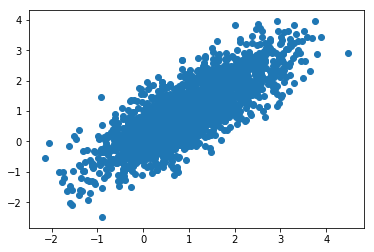

In [29]:
plt.scatter(x_real[:, 0], x_real[:,1])

In [42]:
G = Generator(2,2)
D = Discriminator(2,1)
G_opt = torch.optim.Adam(G.parameters())
D_opt = torch.optim.Adam(D.parameters())

x_t_real = torch.from_numpy(x_real).float()
y = torch.from_numpy(np.concatenate([np.zeros(2000), np.ones(2000)])).float().reshape(-1,1)
for i in range(1):
    z = torch.from_numpy(np.random.normal(size=(2000,2))).float()
    x_fake = G.forward(z)
    X = torch.cat([x_fake, x_t_real])
    y_hat = D.forward(X)
    loss = torch.nn.functional.binary_cross_entropy_with_logits(y_hat, y)


 0.6769
[torch.FloatTensor of size ()]